In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec


from PIL import Image

import astropy.units as u
from astropy.constants import k_B

In [2]:
#Stating theme
import jupyterthemes as jt
!jt -t solarizedl -T -N -kl -nfs 11 -fs 11 -ofs 11 -cursc r -cellw 90%
jt.jtplot.style()
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [3]:
ls group02_data\stills

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\GitHub\AdvancedLab-PHSX444\lab04\group02_data\stills

11/25/2021  01:26 AM    <DIR>          .
11/25/2021  01:26 AM    <DIR>          ..
11/25/2021  01:26 AM    <DIR>          __MACOSX
11/25/2021  01:26 AM         1,144,118 130V second attempt.bmp
11/25/2021  01:26 AM         1,144,118 40V second attempt.bmp
11/25/2021  01:26 AM         1,144,118 40V.bmp
11/25/2021  01:26 AM         1,144,118 Horzontal calibration bottom is mm.bmp
11/25/2021  01:26 AM           609,643 Horzontal-calibration-bottom-is-mm.png
11/25/2021  01:26 AM         1,144,118 Vertical calibration right is mm.bmp
11/25/2021  01:26 AM           929,345 Vertical-calibration-right-is-mm.png
               7 File(s)      7,259,578 bytes
               3 Dir(s)  294,352,801,792 bytes free


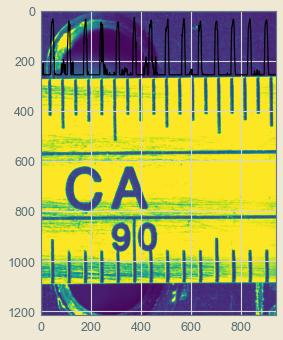

<ipython-input-4-8d4125217c83>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data.real))


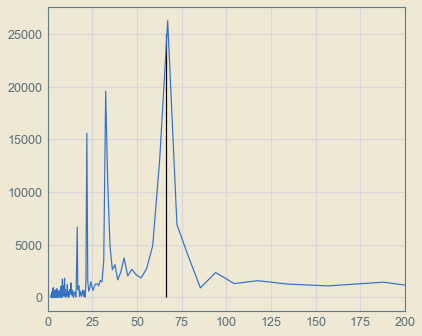

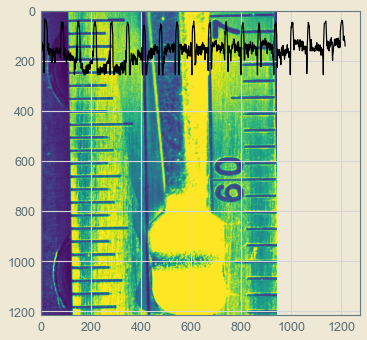

<ipython-input-4-8d4125217c83>:25: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(1/freq, np.abs(data.real))


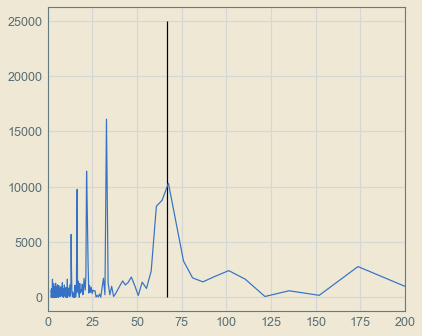

In [4]:
path = './group02_data/stills/'

im = Image.open(path + 'Horzontal calibration bottom is mm.bmp')
plt.imshow(im)
im_data = np.array(im)[1080, :]
plt.plot(im_data, color='black')
plt.show()

freq = np.fft.rfftfreq(im_data.shape[0])
data = np.fft.rfft(im_data)
plt.plot(1/freq, np.abs(data.real))
plt.xlim(0,200)
plt.vlines(66, 0, 25000, color='black')
plt.show()


im = Image.open(path + 'Vertical calibration right is mm.bmp')
plt.imshow(im)
im_data = np.array(im)[:, 900]
plt.plot(im_data, color='black')
plt.show()

freq = np.fft.rfftfreq(im_data.shape[0])
data = np.fft.rfft(im_data)
plt.plot(1/freq, np.abs(data.real))
plt.xlim(0,200)
plt.vlines(67, 0, 25000, color='black')
plt.show()

In [5]:
xscale = (66)
yscale = (67)
xpix = u.def_unit('xpix', 1*u.mm/xscale)
ypix = u.def_unit('ypix', 1*u.mm/yscale)

## key for runs:
<ul>
    <li>01: 60 Hz capture #1</li>
    <li>02: 60 Hz fist bump#1</li>
    <li>03: 61 Hz Capture #1</li>
    <li>04: 198 Hz capture #2 (good) copy</li>
    <li>05: 198 Hz fist bump #1</li>
</ul>

In [6]:
ls 

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\GitHub\AdvancedLab-PHSX444\lab04

11/26/2021  12:33 PM    <DIR>          .
11/26/2021  12:33 PM    <DIR>          ..
11/25/2021  01:25 AM    <DIR>          .ipynb_checkpoints
11/26/2021  12:33 PM         1,346,125 analysis.ipynb
11/26/2021  12:10 PM             8,219 Analysis.py
11/25/2021  01:25 AM               840 calibration.py
11/25/2021  01:25 AM             5,871 cross-correlate_simple.py
11/25/2021  01:26 AM    <DIR>          group02_data
11/26/2021  11:23 AM    <DIR>          images
11/05/2021  05:22 AM    <DIR>          lab_4_Paul_trapping
11/25/2021  01:26 AM    <DIR>          processed_data
11/05/2021  05:22 AM             1,583 Table of Contents.html
11/25/2021  01:25 AM    <DIR>          TheRealDay2lab04ForRealThisIsTheOneWeWant
               5 File(s)      1,362,638 bytes
               8 Dir(s)  294,293,987,328 bytes free


In [7]:
data = pd.read_csv("group02_data/processed_data/data_04.csv")
data.rename(columns={'# x': 'x'}, inplace=True)

data.loc[:, 'x'] = (np.array(data.loc[:, 'x']) * xpix).to(u.mm)
data.loc[:, 'y'] = (np.array(data.loc[:, 'y']) * ypix).to(u.mm)

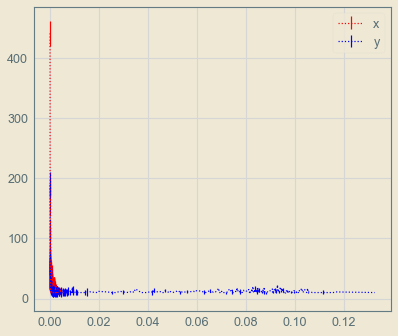

In [8]:
hisx = np.histogram((data["x"]-np.mean(data["x"]))**2, bins=5000)
df = pd.DataFrame({'bin_right': hisx[1][1:], 'count':hisx[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="red", label = 'x')

hisy = np.histogram((data["y"]-np.mean(data["y"]))**2, bins=5000)
df = pd.DataFrame({'bin_right': hisy[1][1:], 'count':hisy[0], 'err':np.sqrt(hisx[0])})
df = df[df['count'] >= 10]
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="blue", label='y')
plt.legend()
plt.show()

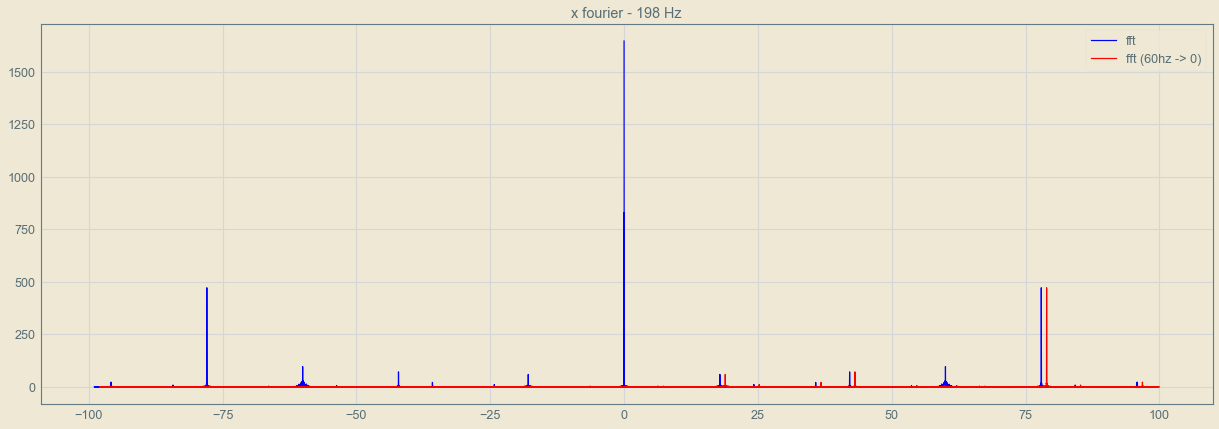

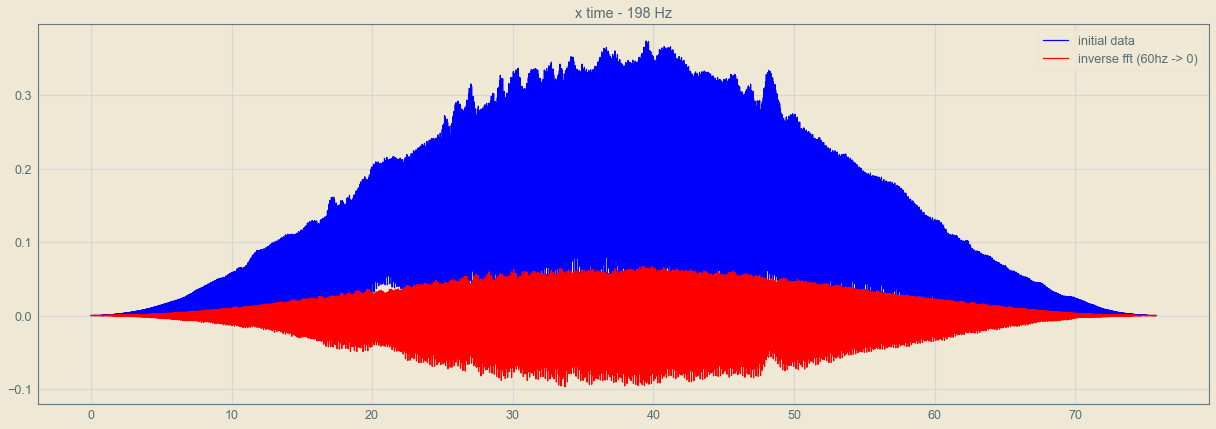

In [9]:
dat = np.sqrt(data['x']**2 + data['y']**2)*np.hanning(len(data['x']))

plt.figure(figsize=(21,7))
dat_four = np.fft.fft(dat)
freq = np.fft.fftfreq(len(dat), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': dat_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='fft')
dffreq.loc[(dffreq['freq']>59) & (dffreq['freq']<61), 'data']=0
dffreq.loc[(dffreq['freq']<1), 'data']=0
plt.plot(dffreq['freq']+1, np.abs(dffreq['data']), color='red', label='fft (60hz -> 0)')
plt.title('x fourier - 198 Hz')
plt.legend()
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(dat)*1/198, len(dat))
plt.plot(t, dat, label='initial data',color = 'blue')
inverse_data = np.fft.ifft(dffreq['data'])
t = np.linspace(0,len(inverse_data)*1/198, len(inverse_data))
plt.title('x time - 198 Hz')
plt.plot(t, np.fft.ifft(dffreq['data']).real, label='inverse fft (60hz -> 0)', color='red')
plt.legend()
plt.show()

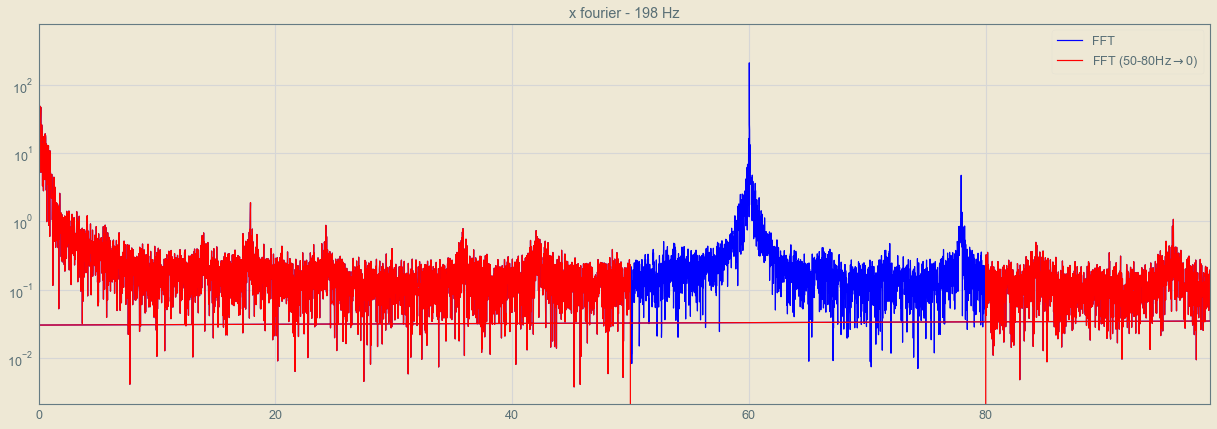

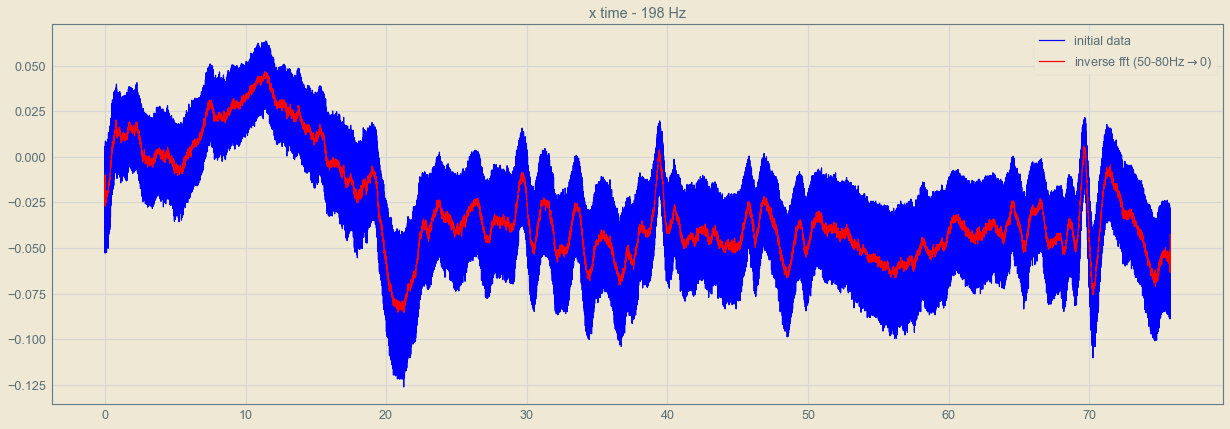

<ipython-input-10-60405f5ffb9e>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


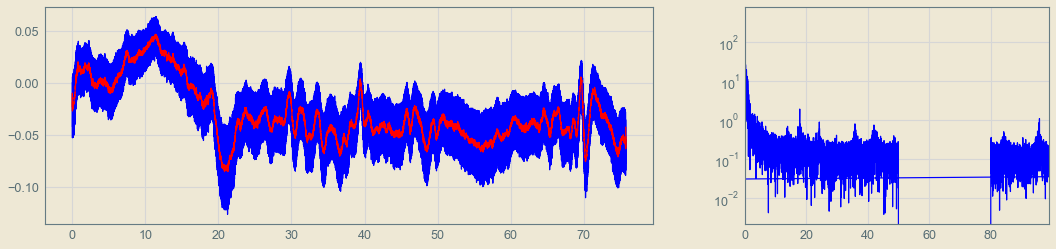

In [10]:
plt.figure(figsize=(21,7))
# datax = data['x']*np.hanning(len(data['x']))
datax = data['x']
datax_four = np.fft.fft(datax)
freq = np.fft.fftfreq(len(datax), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': datax_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='FFT')
dffreq.loc[(np.abs(dffreq['freq'])>50) & (np.abs(dffreq['freq'])<80), 'data']=0
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='red', label=r'FFT (50-80Hz$\rightarrow$0)')
plt.title('x fourier - 198 Hz')
plt.legend()
plt.yscale('log')
plt.xlim(0., np.max(dffreq['freq']))
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(data['x'])*1/198, len(data['x']))
# plt.plot(t, data['x']*np.hanning(len(data['x'])), label='initial data',color = 'blue')
plt.plot(t, data['x'], label='initial data',color = 'blue')
inverse_datax = np.fft.ifft(dffreq['data']).real
t = np.linspace(0,len(inverse_datax)*1/198, len(inverse_datax))
plt.title('x time - 198 Hz')
plt.plot(t, inverse_datax, label=r'inverse fft (50-80Hz$\rightarrow$0)', color='red')
plt.legend()
plt.show()


fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(18)
spec = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1], wspace=0.2, hspace=0.5)
ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])

ax1.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='FFT')
ax1.set_yscale('log')
ax1.set_xlim(0., np.max(dffreq['freq']))

ax0.plot(t, data['x'], label='initial data',color = 'blue')
ax0.plot(t, inverse_datax, label=r'inverse fft (50-80Hz$\rightarrow$0)', color='red')
fig.tight_layout()
plt.show()


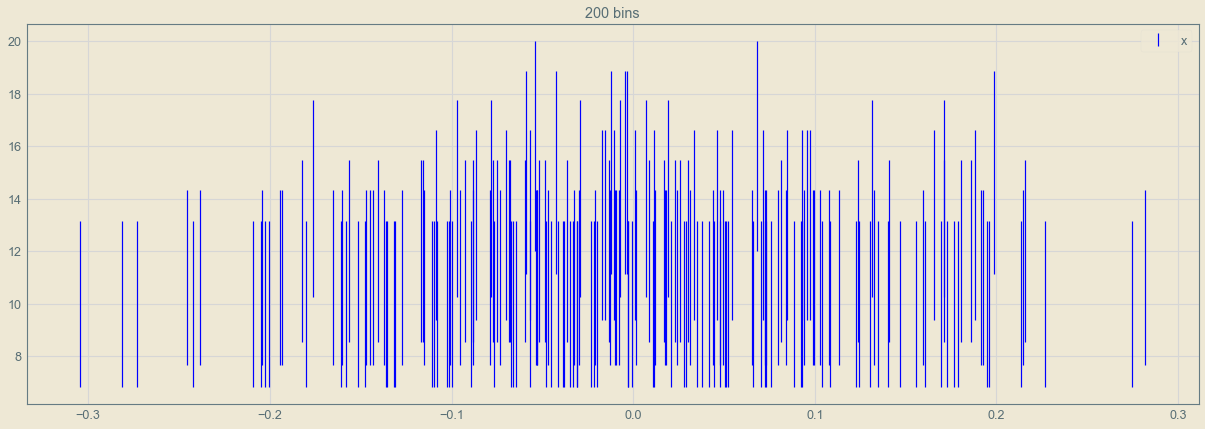

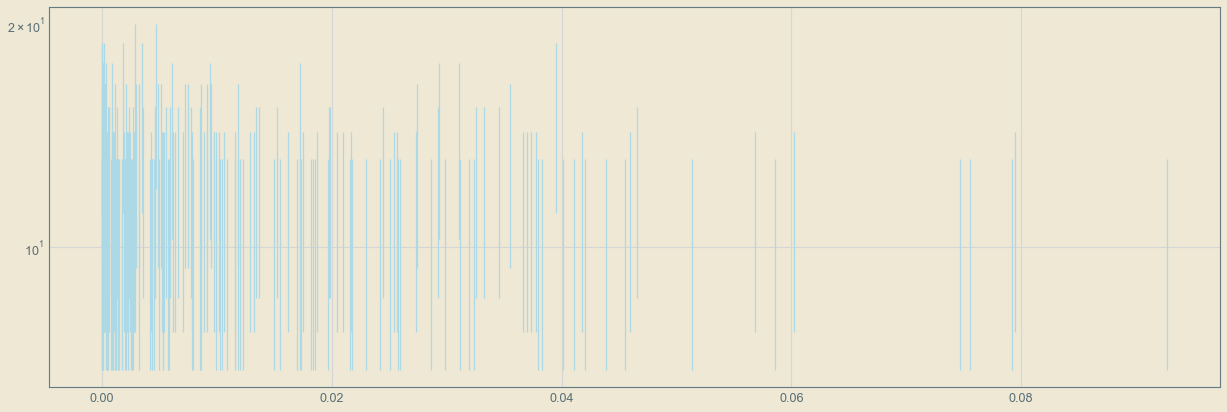

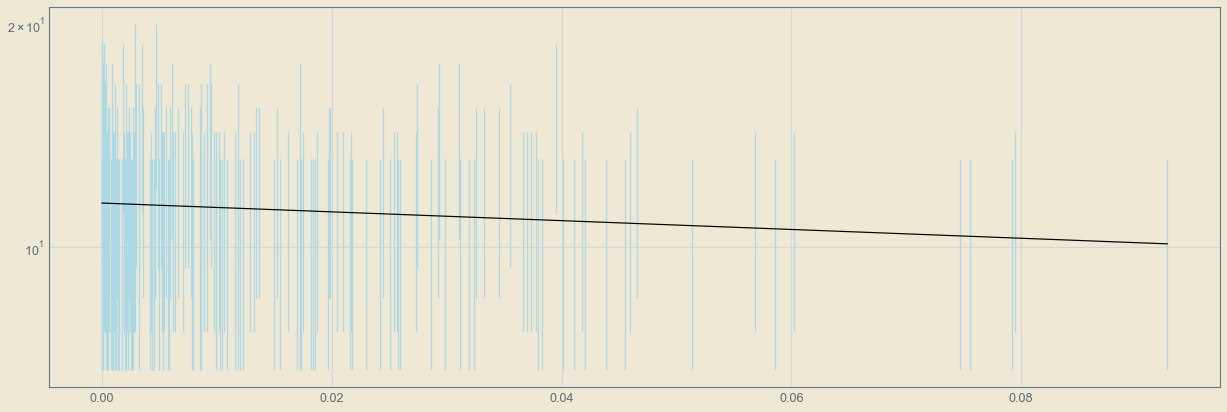

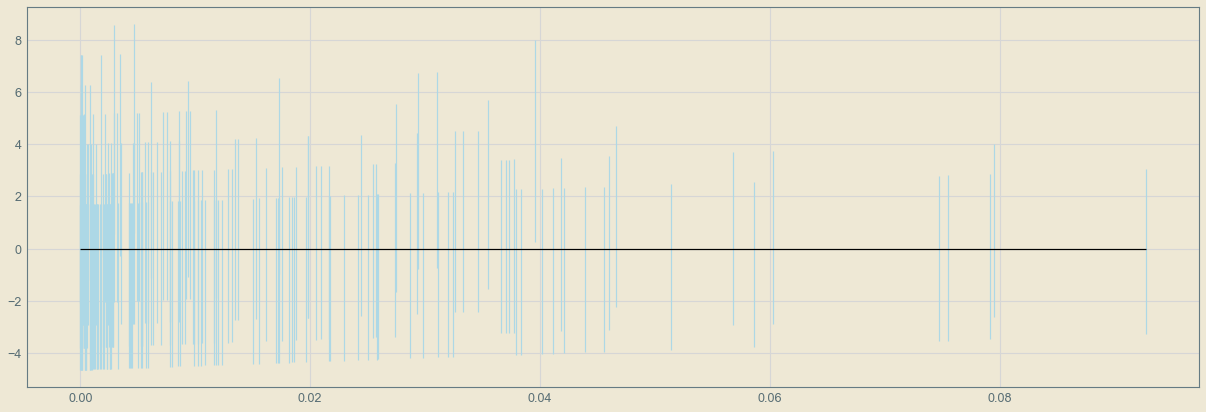

calculated mass: 1.12e+01 pg
chi: 0.25


In [11]:
velx = (inverse_datax[1:] - inverse_datax[:-1])/(1/198)
t = np.linspace(0,len(velx)*1/198, len(velx))

his_velx = np.histogram(velx, bins=20000)
df = pd.DataFrame({'bin_right': his_velx[1][1:], 'count':his_velx[0], 'err':np.sqrt(his_velx[0])})
df = df[df['count'] >= 10]
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="blue", label='x')
plt.legend()
plt.title('200 bins')
plt.show()

plt.figure(figsize=(21,7))
df['bin_right_squr'] = (df['bin_right'])**2
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='x')
plt.yscale('log')
plt.show()

#line fit
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='x')
fit, cov= np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
x = np.linspace(np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), 1000)
plt.plot(x, np.exp(fit[0]*x + fit[1]), color='black')
plt.yscale('log')
plt.show()

plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'] - np.exp(fit[0]*df['bin_right_squr'] + fit[1]), yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='x')
plt.hlines(0, np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), color='black')
plt.show()

T = 298.15*u.Kelvin
m = (fit[0]*(-2*k_B * T)/(u.mm/u.s)**2).to(u.pg)
print(f"calculated mass: {m:.2e}")
print(f"chi: {cov[0,0]:.2f}")

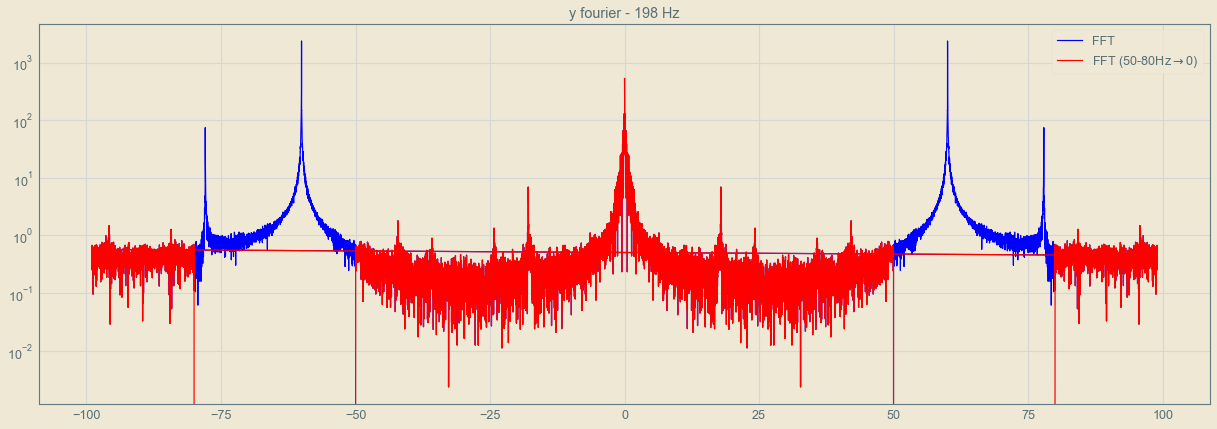

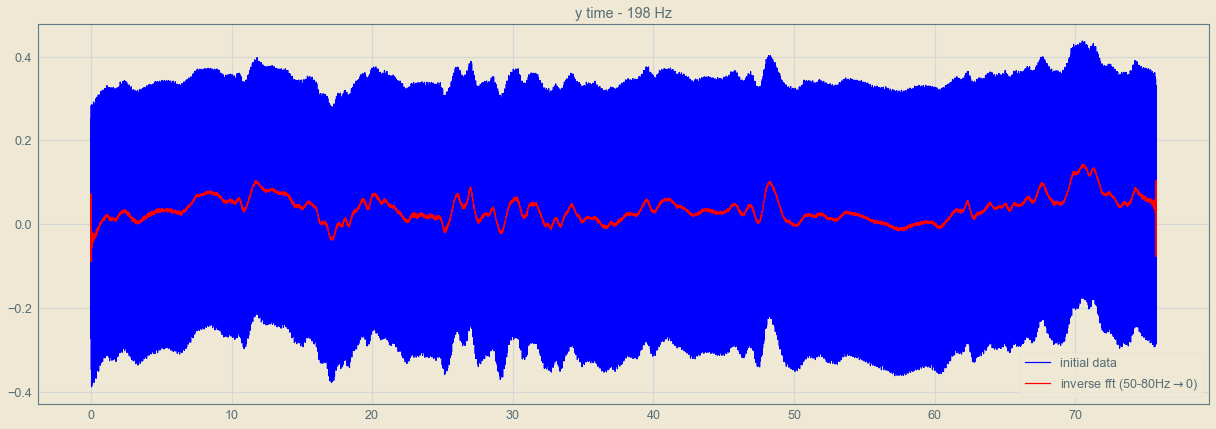

In [29]:
plt.figure(figsize=(21,7))
# datay = data['y']*np.hanning(len(data['y']))
datay = data['y']
datay_four = np.fft.fft(datay)
freq = np.fft.fftfreq(len(datay), 1/198)
dffreq = pd.DataFrame({'freq':freq, 'data': datay_four})
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='blue', label='FFT')
dffreq.loc[(np.abs(dffreq['freq'])>50) & (np.abs(dffreq['freq'])<80), 'data']=0
plt.plot(dffreq['freq'], np.abs(dffreq['data']), color='red', label=r'FFT (50-80Hz$\rightarrow$0)')
plt.title('y fourier - 198 Hz')
plt.legend()
plt.yscale('log')
plt.show()

plt.figure(figsize=(21,7))
t = np.linspace(0,len(data['y'])*1/198, len(data['y']))
# plt.plot(t, data['y']*np.hanning(len(data['y'])), label='initial data',color = 'blue')
plt.plot(t, data['y'], label='initial data',color = 'blue')
inverse_datay = np.fft.ifft(dffreq['data']).real
t = np.linspace(0,len(inverse_datay)*1/198, len(inverse_datay))
plt.title('y time - 198 Hz')
plt.plot(t, inverse_datay, label=r'inverse fft (50-80Hz$\rightarrow$0)', color='red')
plt.legend()
plt.show()

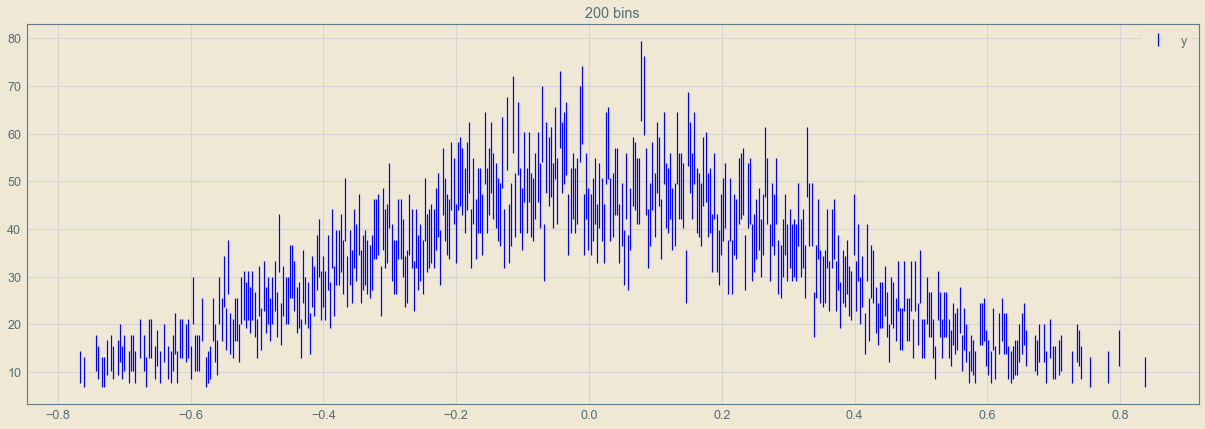

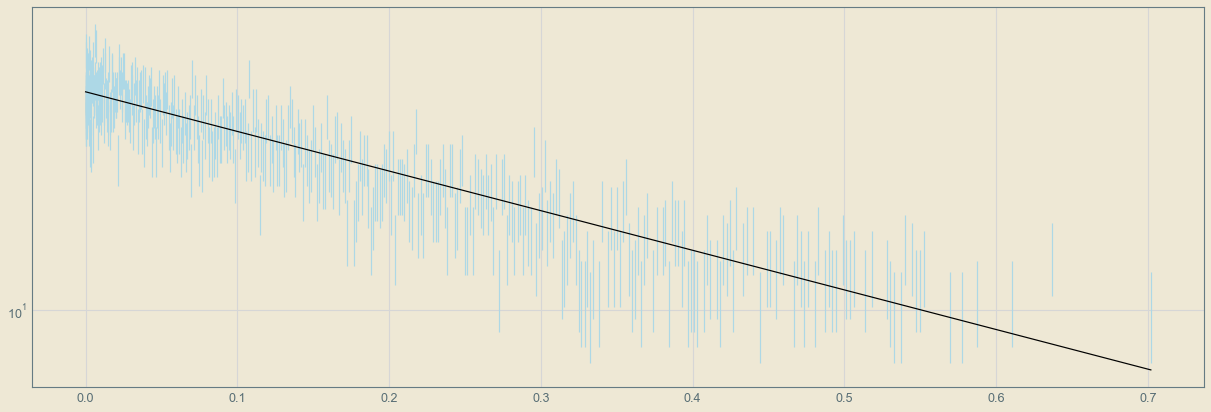

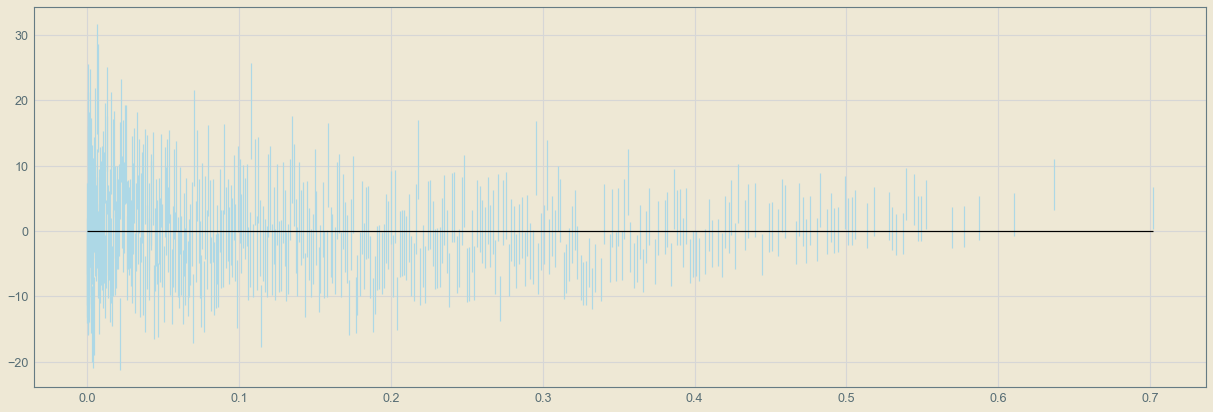

calculated mass: 2.36e+01 pg
chi: 0.0037


In [30]:
vely = (inverse_datay[1:] - inverse_datay[:-1])/(1/198)
t = np.linspace(0,len(vely)*1/198, len(vely))

his_vely = np.histogram(vely, bins=20000)
df = pd.DataFrame({'bin_right': his_vely[1][1:], 'count':his_vely[0], 'err':np.sqrt(his_vely[0])})
df = df[df['count'] >= 10]
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="blue", label='y')
plt.legend()
plt.title('200 bins')
plt.show()

df['bin_right_squr'] = (df['bin_right'])**2

#line fit
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
fit, cov= np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
x = np.linspace(np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), 1000)
plt.plot(x, np.exp(fit[0]*x + fit[1]), color='black')
plt.yscale('log')
plt.show()

plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'] - np.exp(fit[0]*df['bin_right_squr'] + fit[1]), yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
plt.hlines(0, np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), color='black')
plt.show()

T = 298.15*u.Kelvin
m = (fit[0]*(-2*k_B * T)/(u.mm/u.s)**2).to(u.pg)
print(f"calculated mass: {m:.2e}")
print(f"chi: {cov[0,0]:.4f}")

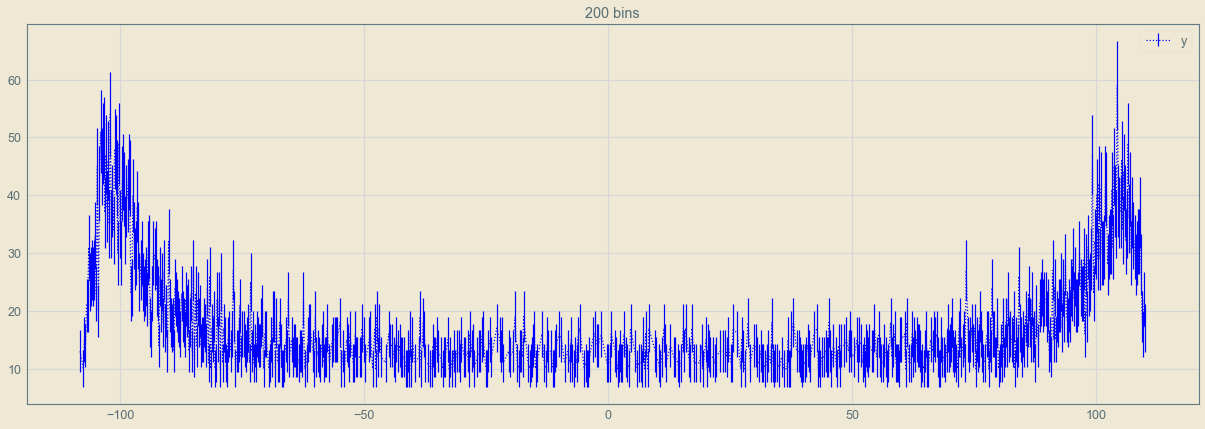

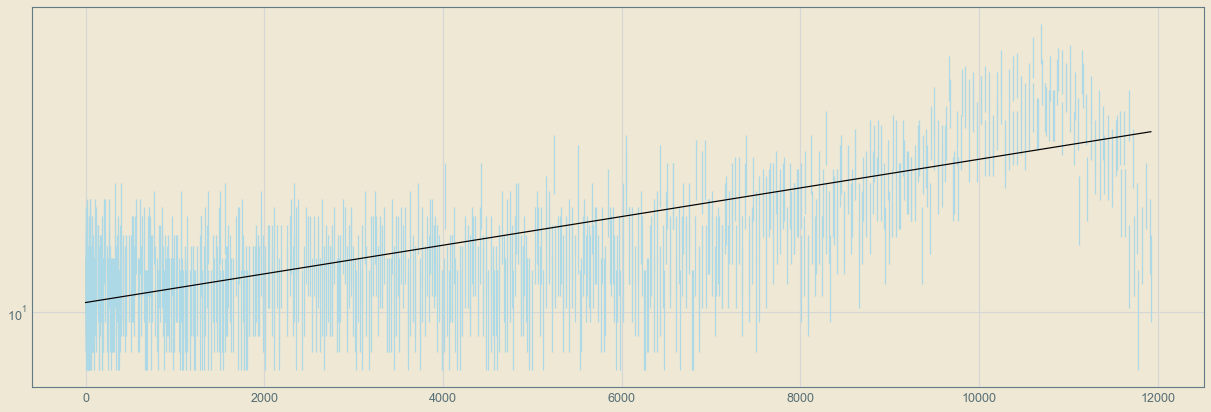

calculated mass: -7.77e-04 pg
chi: 6.93e-12


In [14]:
vel = (np.array(data['y'])[1:] - np.array(data['y'])[:-1])/(1/198)
t = np.linspace(0,len(vel)*1/198, len(vel))

his_vely = np.histogram(vel, bins=1000)
df = pd.DataFrame({'bin_right': his_vely[1][1:], 'count':his_vely[0], 'err':np.sqrt(his_vely[0])})
df = df[df['count'] >= 10]
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle=":", marker="x", color="blue", label='y')
plt.legend()
plt.title('200 bins')
plt.show()

df['bin_right_squr'] = (df['bin_right'] - np.mean(df['bin_right']))**2

plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
fit, cov = np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
x = np.linspace(np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), 1000)
plt.plot(x, np.exp(fit[0]*x + fit[1]), color='black')
plt.yscale('log')
plt.show()

T = 298.15*u.Kelvin
m = (fit[0]*(-2*k_B * T)/(u.mm/u.s)**2).to(u.pg)
print(f"calculated mass: {m:.2e}")
print(f"chi: {cov[0,0]:.2e}")

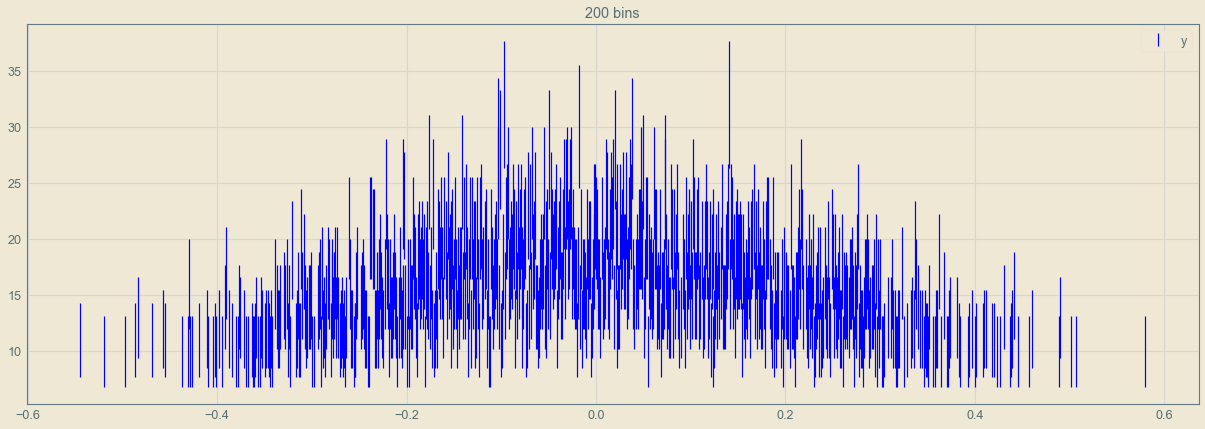

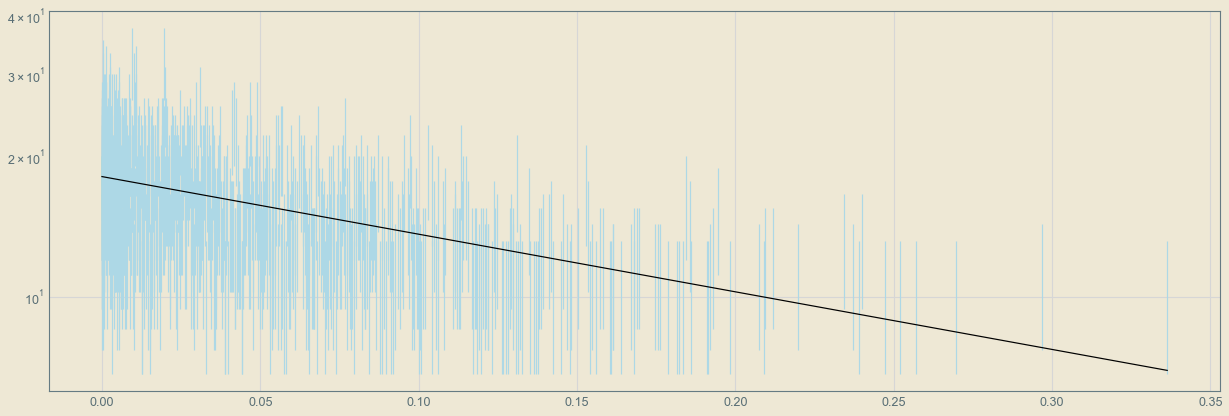

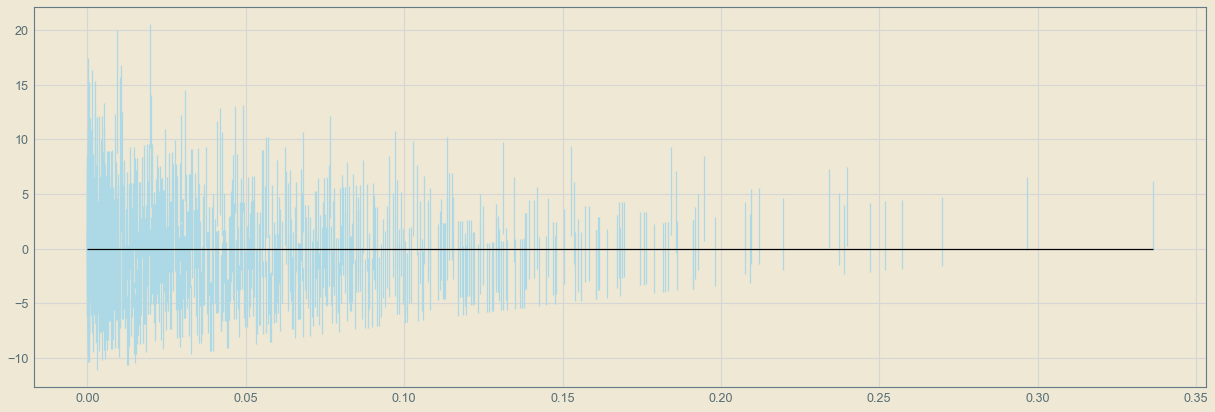

calculated mass: 2.34e+01 pg
chi: 2.42e-02


In [15]:
inverse_data = np.sqrt(inverse_datay**2 + inverse_datax**2)
vel = (inverse_data[1:] - inverse_data[:-1])/(1/198)
t = np.linspace(0,len(vel)*1/198, len(vel))

his_vel = np.histogram(vel, bins=20000)
df = pd.DataFrame({'bin_right': his_vel[1][1:], 'count':his_vel[0], 'err':np.sqrt(his_vel[0])})
df = df[df['count'] >= 10]
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="blue", label='y')
plt.legend()
plt.title('200 bins')
plt.show()

df['bin_right_squr'] = (df['bin_right'])**2

#line fit
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
fit, cov= np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
x = np.linspace(np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), 1000)
plt.plot(x, np.exp(fit[0]*x + fit[1]), color='black')
plt.yscale('log')
plt.show()

plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'] - np.exp(fit[0]*df['bin_right_squr'] + fit[1]), yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
plt.hlines(0, np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), color='black')
plt.show()

T = 298.15*u.Kelvin
m = (fit[0]*(-2*k_B * T)/(u.mm/u.s)**2).to(u.pg)
print(f"calculated mass: {m:.2e}")
print(f"chi: {cov[0,0]:.2e}")

In [16]:
'label_1'
'xlabel_1'
'ylabel_1'
'title_1'
'label_2'
'xlabel_2'
'ylabel_2'
'title_2'
'save_name'

'save_name'

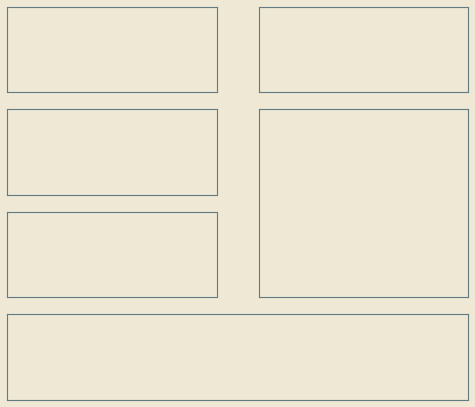

In [17]:
import  matplotlib.pyplot as plt

X = [  (4,2,1),(4,2,2), (4,2,3), (4,2,5), (4,2,(4,6)), (4,1,4)]
plt.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])

plt.show()

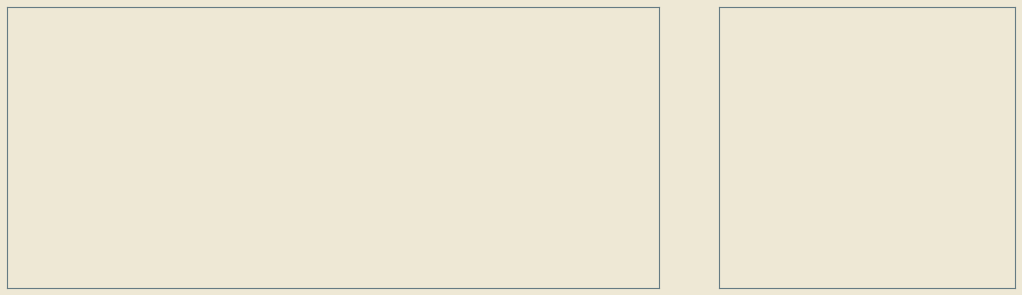

In [18]:
X = [(1,3,(1,2)), (1,3,3)]
plt.figure(figsize=(14,4))
plt.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number in X:
    plt.subplot(nrows, ncols, plot_number)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [122]:
print(np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True))
print(np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True, full=True))
print(np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), full=True))
print(np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err'])))

(array([-2.86610571,  3.8841373 ]), array([[ 0.0037412 , -0.00049914],
       [-0.00049914,  0.00014313]]))
(array([-2.86610571,  3.8841373 ]), array([40.4959306]), 2, array([1.2969582, 0.5638257]), 9.525713551283843e-14)
(array([-2.86610571,  3.8841373 ]), array([40.4959306]), 2, array([1.2969582, 0.5638257]), 9.525713551283843e-14)
[-2.86610571  3.8841373 ]


In [124]:
p, res, x1, x2, x3= np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True, full=True)
p, cov = np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
chisq_red = float(res / (len(df['bin_right_squr']) - 2))
err_a = np.sqrt(cov[0,0])

In [130]:
? np.polyfit

Polynomial([ 2.86628449, -0.98982324], domain=[8.93077376e-07, 7.01893478e-01], window=[-1.,  1.])

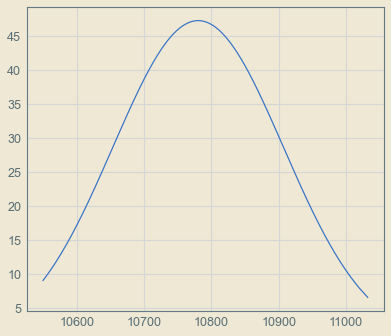

In [47]:
from numpy.polynomial import Polynomial
c = Polynomial.fit(df['bin_right_squr'], np.log(df['count']), deg=1)
plt.plot(np.exp(c(df['bin_right_squr'])))
c

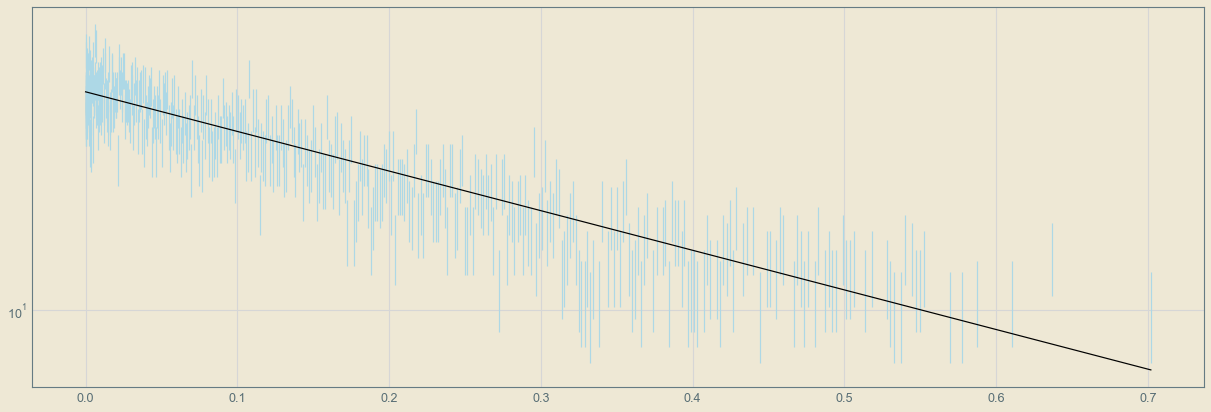

In [60]:
#line fit
plt.figure(figsize=(21,7))
plt.errorbar(df['bin_right_squr'], df['count'], yerr = df['err'], linestyle="None", marker="x", color="lightblue", label='y')
fit, cov= np.polyfit(df['bin_right_squr'], np.log(df['count']), 1, w=np.log(df['err']), cov=True)
x = np.linspace(np.min(df['bin_right_squr']), np.max(df['bin_right_squr']), 1000)
plt.plot(x, np.exp(fit[0]*x + fit[1]), color='black')
plt.yscale('log')
plt.show()

In [48]:
fit

array([-2.86610571,  3.8841373 ])

In [133]:
(600*u.pg).to(u.ng)

<Quantity 0.6 ng>